In [ ]:
pip install ortools


     |████████████████████████████████| 27.1MB 1.3MB/s 


#Projet Data
## Description de  l'algorithme
### Modelisation

1.   Le Problème

Le but de notre étude est de générer une tournée de livraison (problème du VRP). Le problème algorithmique consiste donc à calculer sur un réseau routier une tournée permettant de relier entre elles un sous-ensemble de villes, puis de revenir à son point de départ, de manière à minimiser la distance totale parcourue.
Nous devons proposer une méthode issue de la Recherche Opérationnelle pour générer une tournée de livraison correspondant à ce problème. L’implémentation se fera sur une version de base du problème, à laquelle nous pourrons ajouter des contraintes supplémentaires, rendant le problème plus réaliste, mais aussi plus dur à traiter.
Par ailleurs, nous devrons effectuer une étude statistique du comportement de notre méthode de résolution, faisant apparaitre ses performances (qualité de solution, temps de convergence). Idéalement, des statistiques prédictives permettent d’extrapoler ce comportement sur des cas d’usages que nos ordinateurs seuls ne pourraient traiter.



2.   Etude de Complexité

La complexité permet de quantifier (mettre une formule mathématique) la relation entre les conditions de départ et le temps effectué par l'algorithme , ainsi que l'optimisation du stockage de données dans certains cas. 

Mesure asymptotique:

Nous allons effectuer une comparaison entre deux algorithmes résolvant le même problème de Ro mais de par un procédé différant l'algorithme de (      ) et l'algorithme (     ), l'objectif étant de comparé les temps d'exécution de chacun d'eux.

**Faire comparatif temps d'éxécution des deux algorithmes **

*Deux algorithmes résolvent le même problème (donc sont corrects), et que toutes les opérations sont prises en compte pour la mesure de la complexité, le premier algorithme fait N opérations et le deuxième 2N.*

Consomation de mémoire:

La complexité repose aussi sur le nombre de mémoire allouer pour repondre au problème posés. Un algorithme prenant moins de mémoire se plus susceptible d'avoir un temps d'éxécution plus faible que l'autre .

*Il est intéressant en général de mesurer à la fois la complexité en temps (la rapidité d'exécution) et en mémoire (la quantité d'espace occupé pendant l'exécution) de l'algorithme.*

**Faire comparatif d'utilisation de mémoire pour deux algorithme donnée **

La complexité du pire cas :

Dans se cas,  il est question de mettre les données sotcker dans l'ordre avec lequels elle seront appeller, car une donné spécifique situer à la fin d'un tableau et qui doit etre appeller par une fonction au début du programme, va etre plus long a parcourir que si la donnée était situer au début de tableau. 

**Donner exemple optimisation de code pour éxécution rapide **

*Pour notre exemple, supposons que l'élément se trouve effectivement dans la liste, mais qu'il soit placé à une position aléatoire. Elle a autant de chances de se trouver au début de la liste (donc qui s'arrête très vite), qu'au milieu ou carrément à la fin (on doit alors parcourir toute la liste). En moyenne, on fera donc un demi-parcours par essai : entre un parcours complet et un demi-parcours, il y a seulement un facteur multiplicatif constant, donc c'est équivalent du point de vue de la complexité.*

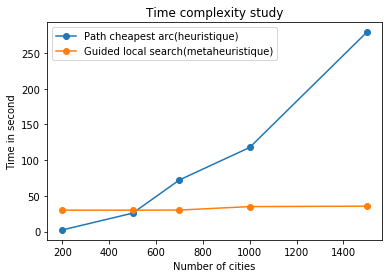

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([200, 500, 700, 1000, 1500])
y = np.array([2.37, 25.82, 72.35, 117.8, 278.98 ])
z= np.array([30.02, 30.01, 30.16, 35, 35.61 ])
plt.plot(x, y, "o-", label="Path cheapest arc(heuristique)")
plt.plot(x, z, "o-", label="Guided local search(metaheuristique)")
plt.ylabel('Time in second')
plt.xlabel('Number of cities')
plt.title('Time complexity study')
plt.legend()

plt.show()

Un graphique réprésentant le nombre villes traiter (en abscisse) par le temps d'exécution des programmes (en ordonné). Le tracé en bleu représente le programme heuristique et le tracé en orange représente le programme metaheuristique, c'est deux programmes sont utilisé et lancer en meme temps pour repondre a un problème similaire donné. Chaque programme a était démarrer avec un nombre de villes a traiter différant a chaque réexécution. L'on peux observer que pour un problème donné ayant moins de 500 villes a traité , la solution heuristique reste la plus rapide alors que pour un programme uilisant plus de 500 villes , la solution metaheuristique devient de plus en plus efficace. Notre solution devant trairer un problème gérant plus de 1000 villes utilisera donc la solution méthaeuristique qui semble etre la solution evidante pour notre projet.

3.   Choix et description de l'algorithme 


L'algorithme choisit est celui de la Recherche Locale Guidée (GLS)

---

**Résumer fonctionnement général :**


La recherche locale guidée (GLS) est un algorithme métaheuristiques dont le but est d'aider la recherche locale pour échapper  à des optimums locaux.

La méthode de recherche locale guidée a été appliquée avec succès à un certain problème d’optimisations difficiles comme le problème du voyageur de commerce (TSP) .

Plus precisement c'est un algorithme d’optimisation  visant à résoudre des problèmes d’optimisation difficile  (souvent issus des domaines de la recherche opérationnel , ou de l’intelligence artificielle. Ils sont généralement des algorithmes stochastique itératifs, qui progressent vers un optimum global.

Cette algorithme vas choisir un optimum local et vas etudier ces caracteristique telles que la distance entre deux ville ou le volumme libre present de le cammions dans notre cas. l'algorithme etudie donc tous les optimun locaux et vas leur associer une penalité qui vas permettre a l'algorithme de trouver la meilleur solution concevable dans un temps donnée. 

---

**Différents paramètres de l'algorithme :**


Les differents paramètre que l'on utilise dans ce programme sont: 


*   Une matrice de distance :  Cette matrice contient la conversion des coordonnées des villes en distance entre celles-ci. Comme cela nous verrons la distance parcourrue par un véhicule pour aller d'une ville à une autre.
*   Une taille d'objet : Cette taille nous est utile pour la gestion des contrainte pour savoir combien d'objet peut contenir un camion.
*   Un volumme de stockage pour les cammion :c'est la taille maximum d'objet qu'un camion peut transporter
*   Un nombre de vehicule utilisable 
*   Une ville de depart et d'arrivée


---
**Spécificités algorithmiques ajoutées à la méthode :**


Pour notre algorithme, nous sommes partis d'un probleme VRP basique, où les seuls parametres sont la distance entre deux ville et le but est de trouver la plus petite distance a parcourir en passant par toutes les villes puis en revenant à son point de depart.

Nous avons decidé d'ajouter à cela une contrainte où les vehicule passent rammaser les objets dans les villes pour les rammener aux points de depart.
Pour cela, nous devont ajouter un parametre qui est la dimmension d'un objet et d'un vehicule. cela nous a ammener à modifier l'algorithme pour qu'il ne recherche plus en premier lieu a faire la plus petite distance, mais qu'il recherche a passer dans toutes les villes avec un objet pour remplir efficacemment le camions et avoir une distance parcourue la plus petite possible.

---
**Modélisation du problème selon le formalisme de l'algorithme :**


L'algorithme va commencer par lancer le programme de creation du dataset.


1.   Dans le Dataset le programme va commencer par demander le nombre de ville que l'on veut generer
2.   Ensuite il vas generer les vehicules nécessaires pour effectuer la tournée
3.   Puis il créé une matrice de localisation 
4.   Ensuite il genere les vehicule et leur dimmension avec la dimmension des objet par ville
5.   Pour finir il ecrit dans un fichier Json les données.

Puis quand cela est fait il demarre l'algorithme qui vas nous generer une solution



1.   Pour cela il va commencer par lire les données du fichier JSON et les parser
2.   Il met en place les paramètres de l'algorithme choisit aux préalable
3.  Il affiche les solution ou la solution possible




##Illustration avec plusieurs cas de tests##

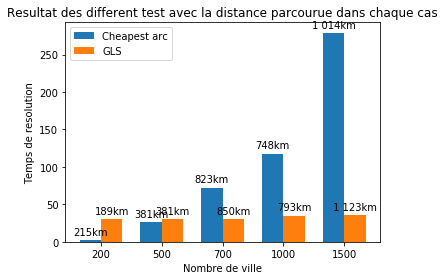

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


men_means, men_std = (2.5, 25.8, 72.4, 117.8, 279), (0, 0, 0,0, 0)
women_means, women_std = (30, 30.1, 30.2, 35, 35.6), (0, 0, 0, 0,0)
ind = np.arange(len(men_means))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, men_means, width, yerr=men_std,
                label='Cheapest arc')
rects2 = ax.bar(ind + width/2, women_means, width, yerr=women_std,
                label='GLS')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Temps de resolution')
ax.set_title('Resultat des different test avec la distance parcourue dans chaque cas')
ax.set_xticks(ind)
ax.set_xlabel('Nombre de ville')
ax.set_xticklabels(('200', '500', '700', '1000', '1500'))
ax.legend()


def autolabel(rects,i):
    xpos='center'
    if i== 1 :
      s= ['215km','381km','823km','748km','1 014km']
    else :
      s= ['189km','381km','850km','793km','1 123km']

    """
    Attach a text label above each bar in rects, displaying its height.

    xpos indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}
    i=0
    for rect in rects:
        height = rect.get_height()
        ax.annotate(s[i] ,
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom')

        i += 1
autolabel(rects1,1)
autolabel(rects2,2)

fig.tight_layout()

plt.show()

Dans ce graphique, nous pouvons voir le temps d'exécution d'un algorithme heuristique et d'un méta-heuristique en fonction du nombre de villes.
Nous pouvons voir que le GLS (méta-heuristique) devient très vite intéressant lors de l'augmentation du nombre de villes à étudier. Le résultat est approché mais reste un résultat correct pour notre problème.

## Etude statistique 

L’analyse descriptive: a pour but de résumer les données en leur assignant une nouvelle représentation, de synthétiser en faisant ressortir ce qui est dissimulé par le volume. On peut classer les individus dans des catégories, trouver les individus les plus proches
ou les plus éloignés entre eux ; mais aussi trouver les exceptions ou les cas atypiques. On peut également voir si des variables sont proches, expliquer une variable en fonction des autres ou encore repérer les variables les plus influentes.<br/>

Moyenne :permet de derniner le temps d'exécution moyen de l'algorithme.<br/>
<img src = "Image/moyenne.jpg" title = "moyenne" alt = "moyenne"><br/>

Médiane: permet de vérifier que la pluspart des valeur sont présente dans la moyenne.<br/>
<img src = "Image/mediane.jpg" title = "mediane" alt = "mediane"><br/>

Variance: La variance d'une variable aléatoire est la mesure de la dispersion des échantillons autour de la moyenne, autrement dit, elle caractérise sa capacité à prendre des valeurs plus ou moins éloignées de son espérance. Cette valeur va nous permettre de vérifier que notre algorithme ne ralentie pas en fonction du nombre de donnée qu'il va traiter.<br/>
<img src = "Image/variance.jpg" title = "variance" alt = "variance"><br/>

L'écart type : L'écart-type sert à mesurer la dispersion, ou l'étalement, d'un ensemble de valeurs autour de leur moyenne. Plus l'écart-type est faible, plus la population est homogène. Cette valeur nous permet de déterminer qu'un linéariter d'exécution (temps) est présente lors de l'exécution des nimporte quel programme, n'y a que très peu d'erreur.<br/>
<img src = "Image/ecart-type.jpg" title = "ecart-type" alt = "ecart-type"><br/>
 
On reconnait deux quantiles particuliers le Q_{0.25} et Q_{0.75} qu’on appelle respectivement des quartiles. Le Quartile Q_{1} correspond au quantile Q_{0.25} et le quartile Q_{3} correspond au quantile Q_{0.75}.<br/>

L'écart interquartile: L’écart intequartile mesure la dispersion de 50% des données du dataset. Les 50% des données correspond à celles comprises entre le premier quartile Q1 et le 3eme quartile Q3. L’écart interquartile est tout simplement la soustraction du troisième quartile du premier.<br/>
<img src = "Image/ecart-intercartile.jpg" title = "ecart-interquartile" alt = "ecart-interquartile"><br/>

L’analyse prédictive: consiste à analyser les données actuelles afin de faire des hypothèses sur des comportements futurs. On se sert des données que l’on possède déjà pour extrapoler et deviner le comportement de nouveaux individus mais également l’évolution des individus déjà présents

Pour une mise en place en entreprise, nous avons conclue que notre algorithme permet de résoudre beaucoup un problème RO du type " voyageur de commerce" avec un grand nombre de paramètre entrer, il serait donc aisé de le déployer et plus raîde d'exécution que la pluspart des algorithmes. L'algorithme étant modifiable mais pouvant s'adapter a la pluspart des besoin de se type, il ne sera donc pas nécessaire de le metttre a jour ou de le rééditer 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats as st
import matplotlib.pyplot as plt
import math
import sys
import json

def moyenne(datademand, datavehicule):
    datademand = np.mean(datademand)
    datavehicule = np.mean(datavehicule)
    print('La moyenne de la taille des objet :' ,round(datademand, 2))
    print('La moyenne de la contenance des vehicule :' ,round(datavehicule, 2), '\n')
    
def mediane(datademand, datavehicule):
    datademand = np.median(datademand)
    datavehicule = np.median(datavehicule)
    print('La médianne de la taille des objet :' ,round(datademand, 2))
    print('La médianne de la contenace des vehicule :' ,round(datavehicule, 2) , '\n')
    
def variance(datademand, datavehicule):
    datademand = np.var(datademand)
    datavehicule = np.var(datavehicule)
    print('La variance de la taille des objet :' ,round(datademand, 2))
    print('La variance de la contenace des vehicule :' ,round(datavehicule, 2) , '\n')
    
def ecart_type(datademand, datavehicule):
    datademand = np.std(datademand)
    datavehicule = np.std(datavehicule)
    print('L\'écart type de la taille des objet :' ,round(datademand, 2))
    print('L\'écart type de la contenace des vehicule :' ,round(datavehicule, 2), '\n') 
    
def quantile(datademand, datavehicule):
    Q1d = round(np.percentile(datademand, 25))
    Q3d = round(np.percentile(datademand, 75))
    Q1v = round(np.percentile(datavehicule, 25))
    Q3v = round(np.percentile(datavehicule, 75))
    datademand = np.median(datademand)
    datavehicule = np.median(datavehicule)
    print('Quartile Q1 de la taille des objet :' ,Q1d)
    print('Quartile Q3 de la taille des objet :' ,Q3d, '\n')
    print('Quartile Q1 de la contenace des vehicule :' ,Q1v)
    print('Quartile Q3 de la contenace des vehicule :' ,Q3v, '\n')
    ecart_interquartile(Q1d,Q3d, Q1v,Q3v)
    
def ecart_interquartile(q1demand, q3demands, q1vehicule, q3vehicule):
    print('L\'écart interquartile de la taille des objet :' ,q3demands-q1demand)
    print('L\'écart interquartile de la contenace des vehicule :' ,q3vehicule-q1vehicule , '\n')
    
def main(argv):
    print('La taille d\'un objet se situe entre 0 et 20')
    print('La contenance d\'un vehicule se situe entre 10 et 100\n')
    # On recupere le Dataset
    with open("Dataset/Data.json".format(argv[0]), 'r') as json_file:
        data = json.load(json_file)
    datademand = data['demands']
    datavehicule = data['vehicle_capacities']
    
    moyenne(datademand, datavehicule)
    mediane(datademand, datavehicule)
    quantile(datademand, datavehicule)
    variance(datademand, datavehicule)
    ecart_type(datademand, datavehicule)
    
    
    
if __name__ == '__main__':
    main(sys.argv[1:])


La taille d'un objet se situe entre 0 et 20
La contenance d'un vehicule se situe entre 10 et 100

La moyenne de la taille des objet : 9.92
La moyenne de la contenance des vehicule : 56.0 

La médianne de la taille des objet : 10.0
La médianne de la contenace des vehicule : 55.5 

Quartile Q1 de la taille des objet : 5.0
Quartile Q3 de la taille des objet : 14.0 

Quartile Q1 de la contenace des vehicule : 5.0
Quartile Q3 de la contenace des vehicule : 14.0 

L'écart interquartile de la taille des objet : 9.0
L'écart interquartile de la contenace des vehicule : 51.0 

La variance de la taille des objet : 34.67
La variance de la contenace des vehicule : 857.0 

L'écart type de la taille des objet : 5.89
L'écart type de la contenace des vehicule : 29.27 

